# Análise de Dados Eleitorais

<center><img src="https://image.freepik.com/vetores-gratis/brasil-na-fila-de-votacao-com-mascara-facial_23-2148710309.jpg" width = 40%></center>

Nos dias 15 de Novembro e 29 de Novembro ocorreram a eleições municipais de 2020, porém muitos não sabem a importância exata das eleições. Desde que as pessoas nascem elas usufruem de serviços públicos que são fornecidos através dos impostos pagos pelos cidadãos. Todos já puderam ver o progresso de pelo menos uma cidade, tal progresso se deve primeiramente a quem mora nas cidades, porém parte também é aos políticos, que através dos impostos conseguem fazer melhorias nas infraestruturas da cidade, na educação, na saúde, entre outros. Portanto, percebe-se que a escolha de um bom representante também é importante para que se tenha progresso. 

Visto as importâncias da eleição esse notebook visa fazer uma análise das eleições de 2020 em comparação com o ano de 2016, utilizando como referência o estado de Minas Gerais e o Brasil como um todo. Os dados utilizados são fornecidos pelo TSE e podem ser encontrados no [Repositório de Dados Eleitorais](https://www.tse.jus.br/hotsites/pesquisas-eleitorais/resultados.html). **As análises realizadas são apenas visando os dados, sem nenhum cunho político.**

Os dados foram alocados no *Drive*, portanto é necessário fazer a montagem do mesmo dentro do *notebook*. Esse passo é utilizado visto que o *colab* está sendo usado e ele possui integração com o drive. Se for reproduzir esse notebook em outro *Jupyter Notebook* é necessário colocar os arquivos na mesma pasta e fazer a leitura deles.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A biblioteca *plotly* será utilizada para poder gerar gráficos mais bonitos, chamativos e mais fáceis de serem entendidos.

In [2]:
!pip install -U plotly

     |████████████████████████████████| 13.2MB 315kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


O geopandas será utilizado para poder fazer mapas com os dados.

In [3]:
!pip install geopandas

     |████████████████████████████████| 972kB 9.5MB/s 
     |████████████████████████████████| 14.8MB 132kB/s 
     |████████████████████████████████| 6.5MB 52.8MB/s 


In [4]:
import os 
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
#Alterando o formato de exibição dos gráficos do pandas
pd.options.plotting.backend = 'plotly'

In [6]:
#Caminho dos arquivos utilizados
pasta_eleicoes = '/content/drive/MyDrive/eleicoes'
arquivo_resultado_2020 = os.path.join(pasta_eleicoes, 'votacao_candidato_munzona_2020.zip')
arquivo_resultado_2016 = os.path.join(pasta_eleicoes, 'votacao_candidato_munzona_2016.zip')
arquivo_candidatos_2020 = os.path.join(pasta_eleicoes, 'consulta_cand_2020.zip')
arquivo_candidatos_2016 = os.path.join(pasta_eleicoes, 'consulta_cand_2016.zip')
arquivo_partidos = os.path.join(pasta_eleicoes, 'partidos2020.csv')
arquivo_BR_municipios_shapefile = '/content/drive/MyDrive/eleicoes/BR_Municipios_2019.shp'

Um ponto importante aqui é que o último arquivo que está sendo importado tem uma extensão ".shp", portanto para que ele rode adequadamente é necessário colocar na mesma pasta todas as outras extensões complementares a ele tais como ".cpg", ".dbf", ".prj", ".shx". Caso não faça isso irá dar erro na hora que for fazer a leitura do arquivo. 

In [7]:
#Variáveis globais
local = 'MG' #Recebe a sigla do estado ou Brasil
tipo_candidato = 'Prefeito'  #Recebe vereador ou prefeito

Os arquivos das votações nos candidatos está zipado, portanto é feita a extração dos aruivos e a leitura apenas do arquivo de interesse.

In [8]:
with ZipFile(arquivo_resultado_2020) as z:
  with z.open(f'votacao_candidato_munzona_2020_{local}.csv') as f:
    resultado_2020 = pd.read_csv(f, sep = ';', encoding='ISO-8859-1', decimal=',')

In [9]:
with ZipFile(arquivo_resultado_2016) as z:
  with z.open(f'votacao_candidato_munzona_2016_{local}.csv') as f:
    resultado_2016 = pd.read_csv(f, sep=';', encoding='ISO-8859-1', decimal=',')

## Análise de Minas Gerais

### Analisando os Dados dos Prefeitos

O método "*info()*" é útil para saber se há dados nulos dentro do conjunto de dados analisado, entender as colunas que estão presentes nele, o tipo delas, quantos valores estão no conjunto de dados. 

In [10]:
resultado_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115349 entries, 0 to 115348
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                115349 non-null  object
 1   HH_GERACAO                115349 non-null  object
 2   ANO_ELEICAO               115349 non-null  int64 
 3   CD_TIPO_ELEICAO           115349 non-null  int64 
 4   NM_TIPO_ELEICAO           115349 non-null  object
 5   NR_TURNO                  115349 non-null  int64 
 6   CD_ELEICAO                115349 non-null  int64 
 7   DS_ELEICAO                115349 non-null  object
 8   DT_ELEICAO                115349 non-null  object
 9   TP_ABRANGENCIA            115349 non-null  object
 10  SG_UF                     115349 non-null  object
 11  SG_UE                     115349 non-null  int64 
 12  NM_UE                     115349 non-null  object
 13  CD_MUNICIPIO              115349 non-null  int64 
 14  NM_M

In [11]:
resultado_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111839 entries, 0 to 111838
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                111839 non-null  object
 1   HH_GERACAO                111839 non-null  object
 2   ANO_ELEICAO               111839 non-null  int64 
 3   CD_TIPO_ELEICAO           111839 non-null  int64 
 4   NM_TIPO_ELEICAO           111839 non-null  object
 5   NR_TURNO                  111839 non-null  int64 
 6   CD_ELEICAO                111839 non-null  int64 
 7   DS_ELEICAO                111839 non-null  object
 8   DT_ELEICAO                111839 non-null  object
 9   TP_ABRANGENCIA            111839 non-null  object
 10  SG_UF                     111839 non-null  object
 11  SG_UE                     111839 non-null  int64 
 12  NM_UE                     111839 non-null  object
 13  CD_MUNICIPIO              111839 non-null  int64 
 14  NM_M

O método "head()" mostra os cinco primeiros resultados do conjunto de dados, ele é utilizado para poder ter uma visão de como os resultados estão sendo mostrados, quais são as colunas, etc, visto que para essas informações não é necessário visualizar o conjunto de dados por inteiro, até porque são muitos dados.

In [12]:
resultado_2016.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,18/10/2020,00:07:51,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MG,53872,TRÊS PONTAS,53872,TRÊS PONTAS,273,13,Vereador,130000069051,55999,CLAUDINEI DE LOURDES PIRES,CLAUDINEI PIRES,#NULO#,12,APTO,2,DEFERIDO,Coligação,55,PSD,Partido Social Democrático,130000005118,PSD - PEN - PCDOB,PSD / PEN / PC do B,5,SUPLENTE,N,341
1,18/10/2020,00:07:51,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MG,53872,TRÊS PONTAS,53872,TRÊS PONTAS,273,13,Vereador,130000043616,12555,LEONEL REZENDE ANTONIO,LEONEL,#NULO#,12,APTO,2,DEFERIDO,Coligação,12,PDT,Partido Democrático Trabalhista,130000003251,PDT PSDB,PDT / PSDB,5,SUPLENTE,N,321
2,18/10/2020,00:07:51,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MG,53872,TRÊS PONTAS,53872,TRÊS PONTAS,273,13,Vereador,130000043618,12500,ANTONIO DONIZETTI FRANCISCO,TEM TEM ANTONIO DONIZETTI,#NULO#,12,APTO,2,DEFERIDO,Coligação,12,PDT,Partido Democrático Trabalhista,130000003251,PDT PSDB,PDT / PSDB,5,SUPLENTE,N,143
3,18/10/2020,00:07:51,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MG,53872,TRÊS PONTAS,53872,TRÊS PONTAS,273,13,Vereador,130000043619,12111,JOSE DA SILVA BRAGA,ZEZE BRAGA,#NULO#,12,APTO,2,DEFERIDO,Coligação,12,PDT,Partido Democrático Trabalhista,130000003251,PDT PSDB,PDT / PSDB,5,SUPLENTE,N,62
4,18/10/2020,00:07:51,2016,2,Eleição Ordinária,1,220,ELEIÇÕES MUNICIPAIS 2016,02/10/2016,M,MG,53872,TRÊS PONTAS,53872,TRÊS PONTAS,273,13,Vereador,130000042737,23777,FRANCISCA DE FATIMA SILVA,FATIMA SILVA,#NULO#,12,APTO,2,DEFERIDO,Coligação,23,PPS,Partido Popular Socialista,130000003189,PPS/PSB,PPS / PSB,5,SUPLENTE,N,87


In [13]:
resultado_2020.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,09/12/2020,07:07:35,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,MG,41238,BELO HORIZONTE,41238,BELO HORIZONTE,34,13,Vereador,130001013517,65007,PATRÍCIA DOS SANTOS DE LIMA MARCELINO,PATRÍCIA MARCELINO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,65,PC do B,Partido Comunista do Brasil,130000119510,PARTIDO ISOLADO,PC do B,4,NÃO ELEITO,N,0
1,09/12/2020,07:07:35,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,MG,44172,CURVELO,44172,CURVELO,100,13,Vereador,130001176346,23678,MAURICIO DINIZ MAGALHÃES,MAURÍCIO MAGALHÃES,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,23,CIDADANIA,Cidadania,130000144823,PARTIDO ISOLADO,CIDADANIA,5,SUPLENTE,N,79
2,09/12/2020,07:07:35,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,MG,41238,BELO HORIZONTE,41238,BELO HORIZONTE,34,13,Vereador,130001018055,10001,CARLOS ALBERTO FIGUEIREDO JUNIOR,CARLOS JÚNIOR DA PERFECTFILM,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,10,REPUBLICANOS,REPUBLICANOS,130000120445,PARTIDO ISOLADO,REPUBLICANOS,5,SUPLENTE,N,0
3,09/12/2020,07:07:35,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,MG,54070,UNAÍ,54070,UNAÍ,280,13,Vereador,130001179461,45800,ANTONIO GERALDO COSTA,DIÁCONO GÊ,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,45,PSDB,Partido da Social Democracia Brasileira,130000145159,PARTIDO ISOLADO,PSDB,5,SUPLENTE,N,833
4,09/12/2020,07:07:35,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,MG,53015,SÃO TOMÁS DE AQUINO,53015,SÃO TOMÁS DE AQUINO,260,13,Vereador,130000787311,55123,RODRIGO JOSE DE OLIVEIRA,RODRIGO DO ZE PEDRO,#NULO#,12,APTO,2,DEFERIDO,Partido isolado,55,PSD,Partido Social Democrático,130000076720,PARTIDO ISOLADO,PSD,5,SUPLENTE,N,102


A última coluna do dataset mostra que ele possui apenas a quantidade de votos nominais, isso significa que para ter o número total de votos de cada candidato é necessário fazer um agrupamento e somar os dados de todas as zonas eleitorais. Dessa forma foi feito o agrupamento pelo número de candidatos e o número da unidade eleitoral, que nesse caso é município, logo após isso é feito uma seleção das colunas que é desejado que permaneça nos dados e extrai apenas a primeira ocorrência delas, de forma que irá ignorar quando elas se repetirem. É feito uma soma da quantidade de votos nominais para assim obter o desejado, que é a quantidade de votos que cada candidato teve, além disso é feito um ordenamento para que apareça do candidato mais votado para o menos votado. O objetivo é ver o candidato mais votado em cada município, portanto após todos os passos anteriores realizados é feita uma eliminação de todos os candidatos, exceto os mais votados.

In [14]:
candidatos_mais_votados_2020 = resultado_2020[resultado_2020['DS_CARGO']== tipo_candidato]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

In [15]:
candidatos_mais_votados_2020

NM_URNA_CANDIDATO  ... QT_VOTOS_NOMINAIS
NR_CANDIDATO NM_UE                                ...                  
55           BELO HORIZONTE                KALIL  ...            784307
13           CONTAGEM                    MARÍLIA  ...            266723
             JUIZ DE FORA      MARGARIDA SALOMÃO  ...            247018
11           UBERLÂNDIA              ODELMO LEÃO  ...            228390
23           MONTES CLAROS        HUMBERTO SOUTO  ...            177592
...                                          ...  ...               ...
11           SERRA DA SAUDADE      ALAOR MACHADO  ...               864
45           ÁGUA COMPRIDA                MAROLA  ...               843
25           ARAÇAÍ                  MARCIO KALÚ  ...               803
40           CORONEL PACHECO               COLÉU  ...               676
25           CEDRO DO ABAETÉ        LUIZ ANTONIO  ...               610

[849 rows x 7 columns]

In [16]:
candidatos_mais_votados_2016 = resultado_2016[resultado_2016['DS_CARGO']==tipo_candidato]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

Um ponto importante a ser levantado nessa análise é que utilizando os dados fornecidos pelo TSE, os resultados gerados para os candidatos mais votados são em relação apenas ao primeiro turno. Para Belo Horizonte, a capital mineira, apresenta que o candidato mais votado foi o João Leite e isso é verdade apenas se considerar o primeiro turno, no segundo turno quem ganha a disputa é o candidato Alexandre Kalil. Essa variação não irá afetar muito os resultados, visto que a análise que será realizada será mais geral e a maior parte das cidades não chegam ao segundo turno, apenas cerca de 1% dos munícipios Brasileiros chegaram no segundo turno para os dois anos analisados.

In [17]:
candidatos_mais_votados_2016

NM_URNA_CANDIDATO  ... QT_VOTOS_NOMINAIS
NR_CANDIDATO NM_UE                                          ...                  
45           BELO HORIZONTE                     JOÃO LEITE  ...            953308
             CONTAGEM                      ALEX DE FREITAS  ...            294260
15           JUIZ DE FORA                   BRUNO SIQUEIRA  ...            255066
11           UBERLÂNDIA                        ODELMO LEÃO  ...            250390
23           MONTES CLAROS                  HUMBERTO SOUTO  ...            199751
...                                                    ...  ...               ...
             SIMÃO PEREIRA                  ANTONIO SARTEI  ...               810
13           SERRANOS                       ZÉ VASCONCELOS  ...               769
55           SÃO SEBASTIÃO DO RIO PRETO  SEBASTIAO DO LUIS  ...               626
25           CEDRO DO ABAETÉ                  LUIZ ANTONIO  ...               617
11           SERRA DA SAUDADE                ALAOR MACHADO  ...               490

[853 rows x 7 columns]

Um ponto bom de ser analisado é se os mesmos partidos que elegeram mais candidatos em 2016 são os mesmos que elegeram em 2020 ou se houve uma mudança. Em Minas Gerais o partido MDB tem a maior força , então espera-se que em 2020 ele se mantenha com mais candidatos eleitos. Para saber qual foi o partido com mais candidatos eleitos é feito um agrupamento da coluna "SG_PARTIDO" (Sigla do Partido).

In [18]:
candidatos_mais_votados_2020.SG_PARTIDO.value_counts()

MDB              100
PSDB              86
DEM               84
PSD               78
PP                64
AVANTE            49
PSB               47
REPUBLICANOS      41
PL                41
PTB               39
PDT               35
PT                28
CIDADANIA         27
SOLIDARIEDADE     22
PATRIOTA          21
PSC               18
PV                17
PSL               15
PODE              15
PMN                7
PROS               7
PC do B            3
PTC                2
PRTB               2
REDE               1
Name: SG_PARTIDO, dtype: int64

Percebe-se que realmente o MDB foi o partido com mais candidatos eleitos, porém essa visualização não é tão objetiva quanto o necessário, por isso será feito uma visualização em forma de gráfico para que fique ainda melhor.

In [19]:
candidatos_mais_votados_2016.SG_PARTIDO.value_counts().plot(kind='bar', title=f'Partidos Mais Votados em {local} no ano de 2016 para {tipo_candidato}')

In [20]:
candidatos_mais_votados_2020.SG_PARTIDO.value_counts().plot(kind='bar', title=f'Partidos Mais Votados em {local} no ano de 2020 para {tipo_candidato}')

Ao comparar os dados de 2020 e 2016 percebe-se que realmente o partido MDB (que voltou antes era chamado de PMDB) é o partido com mais candidatos eleitos em Minas Gerais, seguido do PSDB. Porém, percebe-se também que houve uma queda da quantidade de candidatos eleitos nos dois partidos mais fortes. Além desses pontos é notável que os partidos PSD e DEM cresceram na quantidade de candidatos eleitos no período de 2016 para 2020 e o Avante (antigo PT do B) também teve um aumento expressivo.

### Quem venceu mais? Direita, centro ou Esquerda?

Agora sabe-se quais foram os partidos mais votados no estado de Minas Gerais, porém também é interessante saber se os partidos que mais venceram foram de direita, de esquerda ou de centro. Claro que apenas a título de análise, sem nenhuma vertente política de fato. Para fazer tal análise está sendo utilizado um arquivo contendo o partido e o seu espectro (direita, esquerda ou centro). O arquivo utilizado foi uma junção da definição de espectro encontrada para cada partido com as colunas de sigla dos partidos ("SG_PARTIDO") e do número do partido ("NR_PARTIDO") encontradas no dataset disponibilizado pelo site do governo.

In [21]:
partidos = pd.read_csv(arquivo_partidos)

In [22]:
partidos

,Espectro,SG_PARTIDO_TR,SG_PARTIDO,NR_PARTIDO
0,centro,AVANTE,AVANTE,70
1,direita,DC,DC,27
2,direita,DEM,DEM,25
3,centro,MDB,MDB,15
4,direita,NOVO,NOVO,30
5,direita,PATRIOTA,PATRIOTA,51
6,esquerda,PCB,PCB,21
7,esquerda,PCDOB,PC do B,65
8,esquerda,PCO,PCO,29
9,esquerda,PDT,PDT,12


A função "*CategoricalDtype*" é utilizada para que se tenha garantia de que as categorias utilizadas (direita, esquerda e centro) sejam consistentes entre todas as colunas.

In [23]:
espectro_type = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)

In [24]:
partidos['Espectro'] = partidos['Espectro'].astype(espectro_type)

In [25]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Espectro       33 non-null     category
 1   SG_PARTIDO_TR  33 non-null     object  
 2   SG_PARTIDO     33 non-null     object  
 3   NR_PARTIDO     33 non-null     int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.0+ KB


Para poder fazer a análise desejada é feita uma junção dos dois datasets, o que contém os espectros e o que é mais completo.

In [26]:
candidatos_mais_votados_2016 = candidatos_mais_votados_2016.merge(partidos[['NR_PARTIDO', 'Espectro']],
                                                                  left_on = 'NR_PARTIDO', right_on = 'NR_PARTIDO')
candidatos_mais_votados_2020 = candidatos_mais_votados_2020.merge(partidos[['NR_PARTIDO', 'Espectro']],
                                                                  left_on = 'NR_PARTIDO', right_on = 'NR_PARTIDO')

É possível ver que a coluna "espectro" foi adicionada, de forma simples e fácil, ao dataset original.

In [27]:
candidatos_mais_votados_2020

,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS,Espectro
0,KALIL,BELO HORIZONTE,41238,ELEITO,55,PSD,784307,direita
1,VITTORIO MEDIOLI,BETIM,41335,ELEITO,55,PSD,153144,direita
2,DELEGADO CHRISTIANO XAVIER,SANTA LUZIA,51551,ELEITO,55,PSD,74920,direita
3,MARCELO CHAVES,TRÊS PONTAS,53872,ELEITO,55,PSD,24370,direita
4,GORDO DENTISTA,TRÊS CORAÇÕES,53856,ELEITO,55,PSD,20569,direita
...,...,...,...,...,...,...,...,...
844,TXAI,NOVA ERA,48933,ELEITO,18,REDE,4524,esquerda
845,HERBERT,ANTÔNIO CARLOS,40576,NÃO ELEITO,36,PTC,2244,direita
846,JOHN WERCOLLIS,PRATINHA,50598,ELEITO,36,PTC,1717,direita
847,GERALDO SILVA,FREI LAGONEGRO,42064,ELEITO,28,PRTB,1709,direita


O arquivo colocado, anteriormente, dentro da variável "arquivo_BR_municipios_shapefile" possui uma extensão específica para fazer um mapa. Será plotado um mapa visto que dessa forma se tiver grandes alterações de um ano para o outro será visto facilmente.

In [28]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)

In [29]:
if local != 'BRASIL':
  geo_df = geo_df[geo_df.SIGLA_UF == local]
geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

In [30]:
candidatos_mais_votados_2016_geo_df = geo_df.merge(candidatos_mais_votados_2016, left_on = "NM_MUN", right_on = "NM_MUNICIPIO")
candidatos_mais_votados_2020_geo_df = geo_df.merge(candidatos_mais_votados_2020, left_on = "NM_MUN", right_on = "NM_MUNICIPIO")

In [31]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py

In [32]:
espectro = [candidatos_mais_votados_2016.Espectro.value_counts().index[0],
            candidatos_mais_votados_2016.Espectro.value_counts().index[1],
            candidatos_mais_votados_2016.Espectro.value_counts().index[2]]
espectro

['direita', 'centro', 'esquerda']

In [33]:
data = [go.Bar(x=espectro,
               y=candidatos_mais_votados_2016.Espectro.value_counts().values,
               name = '2016'),
        go.Bar(x=espectro,
               y=candidatos_mais_votados_2020.Espectro.value_counts().values,
               name = '2020')]

configuracoes_layout = go.Layout(title=f'Espectro mais votados {local} em 2016 e 2020 ({tipo_candidato})',
                                 yaxis={'title':'Votos'},
                                 xaxis={'title': 'Espectro'}
                                )

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.plot(fig, filename=f'Espectro mais votados {local} em 2016 e 2020 ({tipo_candidato}).html')

'Espectro mais votados MG em 2016 e 2020 (Prefeito).html'

Os gráficos de barra utilizando a quantidade de candidatos eleitos para cada espectro mostra a quantidade exata deles. Ao visualizar percebe-se que em 2016 houve mais ou menos a mesma quantidade de candidatos eleitos da direita e do centro, já em 2020 houve muito mais candidatos da direita eleitos, sendo cerca de 100 candidatos a mais do que na eleição anterior. 

Esses dados podem ser mais visualmente analisados através dos gráficos, porém é necessário a análise no gráfico de barras para que não ocorra análises diferentes de pessoa para pessoa, visto que quando há números de fato não é necessário uma dedução (igual é necessário ao visualizar o mapa).

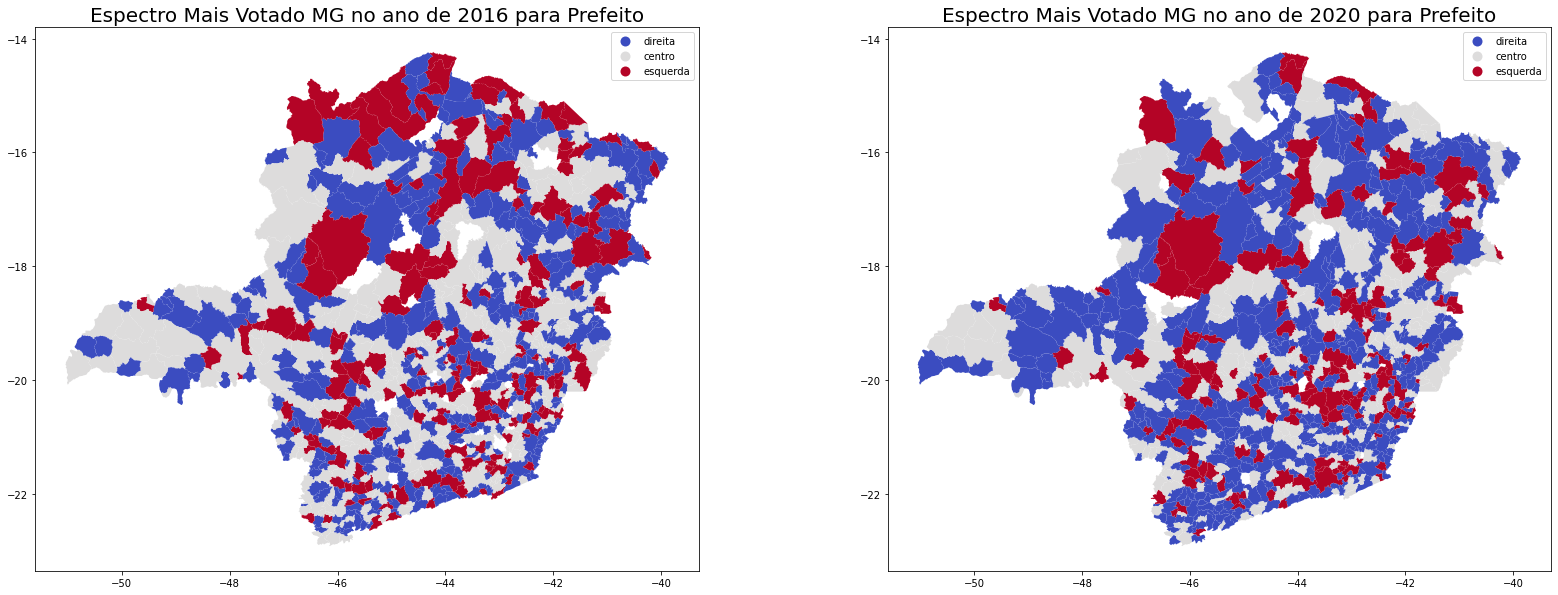

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (28, 10))
ax[0].set_title(f'Espectro Mais Votado {local} no ano de 2016 para {tipo_candidato}', color = 'black', size = 20)
ax[1].set_title(f'Espectro Mais Votado {local} no ano de 2020 para {tipo_candidato}', color = 'black', size = 20)

candidatos_mais_votados_2016_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
candidatos_mais_votados_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1]);

### Análise da Distribuição dos Vereadores Eleitos

In [35]:
vereadores_eleitos_2016 = resultado_2016[(resultado_2016['DS_CARGO'] == 'Vereador') & (resultado_2016['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                          .groupby(['NR_CANDIDATO', 'NM_UE'])\
                          .agg({'NM_CANDIDATO': 'first', 'NM_MUNICIPIO': 'first',
                                'DS_SIT_TOT_TURNO': 'first', 'NR_PARTIDO': 'first',
                                'SG_PARTIDO': 'first', 'QT_VOTOS_NOMINAIS': 'sum'})\
                          .sort_values(by='QT_VOTOS_NOMINAIS', ascending = False)\
                          .merge(partidos[['NR_PARTIDO', 'Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [36]:
vereadores_eleitos_2020 = resultado_2020[(resultado_2020['DS_CARGO'] == 'Vereador') & (resultado_2020['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                          .groupby(['NR_CANDIDATO', 'NM_UE'])\
                          .agg({'NM_CANDIDATO': 'first', 'NM_MUNICIPIO': 'first',
                                'DS_SIT_TOT_TURNO': 'first', 'NR_PARTIDO': 'first',
                                'SG_PARTIDO': 'first', 'QT_VOTOS_NOMINAIS': 'sum'})\
                          .sort_values(by='QT_VOTOS_NOMINAIS', ascending = False)\
                          .merge(partidos[['NR_PARTIDO', 'Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [37]:
data = [go.Bar(x=espectro,
               y=vereadores_eleitos_2016.Espectro.value_counts().values,
               name = '2016'),
        go.Bar(x=espectro,
               y=vereadores_eleitos_2020.Espectro.value_counts().values,
               name = '2020')]

configuracoes_layout = go.Layout(title=f'Espectro mais votados {local} em 2016 e 2020 (vereador)',
                                 yaxis={'title':'Votos'},
                                 xaxis={'title': 'Espectro'}
                                )

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.plot(fig, filename=f'Espectro mais votados {local} em 2016 e 2020 (vereador).html')

'Espectro mais votados MG em 2016 e 2020 (vereador).html'

## Análise do Brasil

In [38]:
#variáveis globais
local = 'BRASIL'
tipo_candidato = 'Prefeito'

In [39]:
with ZipFile(arquivo_resultado_2020) as z:
  with z.open(f'votacao_candidato_munzona_2020_{local}.csv') as f:
    resultado_br_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

with ZipFile(arquivo_resultado_2016) as z:
  with z.open(f'votacao_candidato_munzona_2016_{local}.csv') as f:
    resultado_br_2016 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [40]:
candidatos_mais_votados_br_2020 = resultado_br_2020[resultado_br_2020['DS_CARGO']== tipo_candidato]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

candidatos_mais_votados_br_2016 = resultado_br_2016[resultado_br_2016['DS_CARGO']==tipo_candidato]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first', 
      'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
      'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
      .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
      .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

In [41]:
data = [go.Bar(x=candidatos_mais_votados_br_2016.SG_PARTIDO.value_counts().index,
               y=candidatos_mais_votados_br_2016.SG_PARTIDO.value_counts().values,
               name = '2016'),
        go.Bar(x=candidatos_mais_votados_br_2020.SG_PARTIDO.value_counts().index,
               y=candidatos_mais_votados_br_2020.SG_PARTIDO.value_counts().values,
               name = '2020')]

configuracoes_layout = go.Layout(title=f'Partidos Mais Votados {local} 2016 e 2020 ({tipo_candidato})',
                                 yaxis={'title':'Votos'},
                                 xaxis={'title': 'Espectro'}
                                )

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.plot(fig, filename=f'Partidos Mais Votados {local} 2016 e 2020({tipo_candidato}).html')

'Partidos Mais Votados BRASIL 2016 e 2020(Prefeito).html'

In [42]:
candidatos_mais_votados_br_2020.SG_PARTIDO.value_counts().plot(kind='bar',title=f'Partido Mais Votados {local} 2020 ({tipo_candidato})')

Em 2016 os partidos PSDB e MDB lideraram o número de candidatos eleitos, já em 2020 os que lideraram foram o MDB e o PP, o PSDB teve uma queda expressiva de cerca de 800 candidatos eleitos para cerca de 500. O MDB por mais que ele tenha continuado como o partido com maior quantidade de candidatos eleitos também teve uma diminuição expressiva de mais de 200 candidatos eleitos. Os PP e o PSD que tiveram aumento no número de candidatos eleitos tiveram uma diferença de cerca de 100 candidatos. 

In [43]:
candidatos_mais_votados_br_2020 = candidatos_mais_votados_br_2020.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

candidatos_mais_votados_br_2016 = candidatos_mais_votados_br_2016.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

O arquivo já havia sido lido, porém é necessário refazer a leitura visto que ele foi modificado anteriormente e os dados que permaneceram nele foram apenas os do estado de Minas Gerais e agora a análise desejado é de todo o país.

In [44]:
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)

In [45]:
if local != 'BRASIL':
  geo_df = geo_df[geo_df.SIGLA_UF == local]

geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

In [46]:
candidatos_mais_votados_2020_geo_df_br = geo_df.merge(candidatos_mais_votados_br_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO')
candidatos_mais_votados_2016_geo_df_br = geo_df.merge(candidatos_mais_votados_br_2016, left_on='NM_MUN', right_on='NM_MUNICIPIO')

Percebe-se que a visualização através do mapa realmente é algo mais bonito visualmente, porém sem um dado numérico fica complicado de se ter certeza de qual espectro que predominou nos anos de 2016 e 2020. O mapa será utilizado apenas para o fornecimento de uma análise mais geral, visto que é possível perceber que houve um aumento dos candidatos de direita eleitos, mas sobre os outros espectros não é possível precisar.

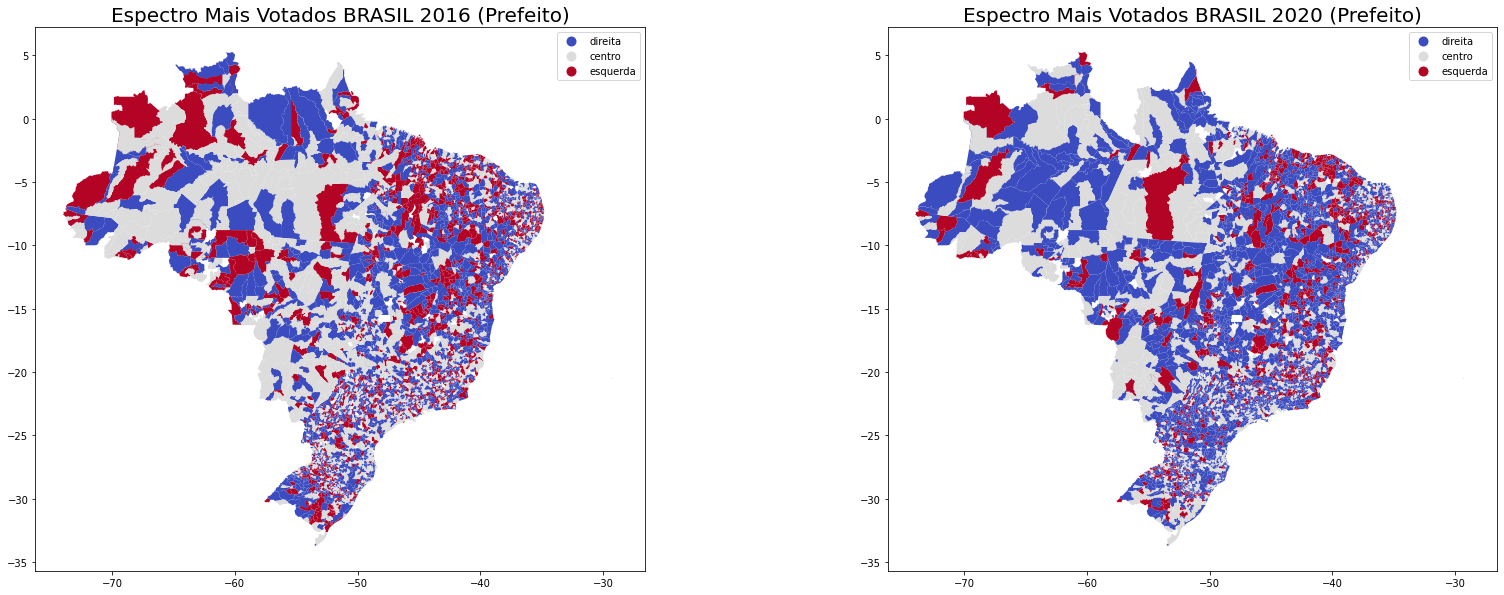

In [47]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votados {local} 2016 ({tipo_candidato})', color='black', size=20)
ax[1].set_title(f'Espectro Mais Votados {local} 2020 ({tipo_candidato})', color='black', size=20)

candidatos_mais_votados_2020_geo_df_br.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])
candidatos_mais_votados_2016_geo_df_br.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0]);

In [48]:
candidatos_mais_votados_br_2016.Espectro.value_counts().index

CategoricalIndex(['direita', 'centro', 'esquerda'], categories=['direita', 'centro', 'esquerda'], ordered=True, dtype='category')

In [49]:
data = [go.Bar(x=candidatos_mais_votados_br_2016.Espectro.value_counts().index,
               y=candidatos_mais_votados_br_2016.Espectro.value_counts().values,
               name = '2016'),
        go.Bar(x=candidatos_mais_votados_br_2020.Espectro.value_counts().index,
               y=candidatos_mais_votados_br_2020.Espectro.value_counts().values,
               name = '2020')]

configuracoes_layout = go.Layout(title=f'Espectro Mais Votados {local} 2016 e 2020 ({tipo_candidato})',
                                 yaxis={'title':'Votos'},
                                 xaxis={'title': 'Espectro'}
                                )

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.plot(fig, filename=f'Espectro Mais Votados {local} 2016 e 2020({tipo_candidato}).html')

'Espectro Mais Votados BRASIL 2016 e 2020(Prefeito).html'

In [50]:
candidatos_mais_votados_br_2020.Espectro.value_counts().plot(kind='bar',title=f'Espectro Mais Votados {local} 2020 ({tipo_candidato})')

Utilizando o gráfico de barras fica bem fácil a análise realizada. Em 2016 houveram cerca de 2200 candidatos da direita eleitos, cerca de 2000 do centro e cerca de 1400 da esquerda. Já em 2020 houveram cerca de 3000 candidatos da direita, cerca de 1500 do centro e 1000 da esquerda. Dessa forma, percebe-se que de fato houve um aumento do número de candidatos da direita eleitos e uma diminuição similar para os do centro e da esquerda.

### Análise dos Candidatos

In [51]:
with ZipFile(arquivo_candidatos_2020) as z:
  with z.open(f'consulta_cand_2020_{local}.csv') as f:
    candidatos_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

with ZipFile(arquivo_candidatos_2016) as z:
  with z.open(f'consulta_cand_2016_{local}.csv') as f:
    candidatos_2016 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (20,57) have mixed types.Specify dtype option on import or set low_memory=False.



In [52]:
data = [go.Bar(x=candidatos_2016['DS_GRAU_INSTRUCAO'].value_counts().index,
               y=candidatos_2016['DS_GRAU_INSTRUCAO'].value_counts().values,
               name = '2016'),
        go.Bar(x=candidatos_2020['DS_GRAU_INSTRUCAO'].value_counts().index,
               y=candidatos_2020['DS_GRAU_INSTRUCAO'].value_counts().values,
               name = '2020')]

configuracoes_layout = go.Layout(title=f'Grau de instrução dos candidatos do {local} em 2016 e 2020',
                                 yaxis={'title':'Votos'},
                                 xaxis={'title': 'Espectro'}
                                )

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.plot(fig, filename=f'Grau de instrução dos candidatos do {local} em 2016 e 2020.html')

'Grau de instrução dos candidatos do BRASIL em 2016 e 2020.html'

Para os dois anos que estão sendo analisados o grau de instrução predominante entre todos os candidatos (prefeito e vereador) é o "Ensino médio completo", seguido de "superior completo" e "ensino fundamental incompleto". Portanto, percebe-se que há uma certa constância no grau de instrução dos canditados, claro que teria que se fazer uma análise com mais anos para ter uma informação mais precisa. A quantidade de candidatos com "ensino médio completo" teve um aumento de 2016 para 2020, sendo que em 2020 há mais de 200 mil candidatos com esse grau de instrução, já para os outros dois graus predominantes houve uma diminuição.

Uma outra análise importante para os candidatos e para a representatividade é saber uma homogeneidade das cores e raças candidatas em 2016 e 2020.

In [53]:
data = [go.Bar(x=candidatos_2016['DS_COR_RACA'].value_counts().index,
               y=candidatos_2016['DS_COR_RACA'].value_counts().values,
               name = '2016'),
        go.Bar(x=candidatos_2020['DS_COR_RACA'].value_counts().index,
               y=candidatos_2020['DS_COR_RACA'].value_counts().values,
               name = '2020')]

configuracoes_layout = go.Layout(title=f'Cores e raças dos candidatos no {local} em 2016 e 2020',
                                 yaxis={'title':'Votos'},
                                 xaxis={'title': 'Espectro'}
                                )

# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.plot(fig, filename=f'Cores e raças dos candidatos no {local} em 2016 e 2020.html')

'Cores e raças dos candidatos no BRASIL em 2016 e 2020.html'

Como pode ser visto nos gráfios a predominância nos candidatos é a pessoas brancas, seguido de pardas e pretas. Um ponto importante é que está havendo um aumento nos candidatos que não sejam brancos (predominantes) caminhando por uma maior igualdade e diversidade, o que é extremamente vantajoso para toda a sociedade visto que esse fato mostra progresso.

## Conclusão

Há diversas outras análises que podem ser feitas, começando com uma análise de tempo mais abrangante para ver a mudança ao longo de muitos anos, mas as análises que foram feitas já foram suficientes para dar um panorama geral sobre os candidatos, sobre quais foram os partidos que mais venceram tanto no Brasil quanto em Minas Gerais, sobre qual o espectro (direita, esquerda ou centro) tem sido predominante na política nos últimos anos.  